In [16]:
import pandas as pd
import os
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(24,8)})
df = pd.DataFrame()

# Read in the bikes data
data_path = 'data/'
for f in os.listdir(data_path)[:]:
    if 'bikes' in f and f.split(".")[-1] == 'csv':
        try:
            tmp = pd.read_csv(data_path + f,index_col=0)
            date = f.split("_")[1].split(".")[0]
            tmp.index = (pd.to_datetime(pd.Series(tmp.index).apply(lambda x: " ".join([date,x])),
                                 yearfirst=True))
            df = pd.concat([df,tmp],axis=0)
        except:
            print("Error in file {}".format(f))
df.fillna(0,inplace=True)
# df.drop('CLARENDON_ROW',axis=1,inplace=True)
class DublinBikes:
    def __init__(self,df) -> None:
        self.df = df
        self.days = list(set(df.index.date))
        self.days.sort()
    def get_data_by_date_idx(self,idx):
        return self.get_data_by_date(self.days[idx])

    def get_data_by_date(self,yymmdd):
        d = pd.Timestamp(yymmdd)
        idx = (self.df.index>pd.Timestamp(d)) & (self.df.index < d+pd.DateOffset(1))
        return self.df[idx]
dataset = DublinBikes(df)

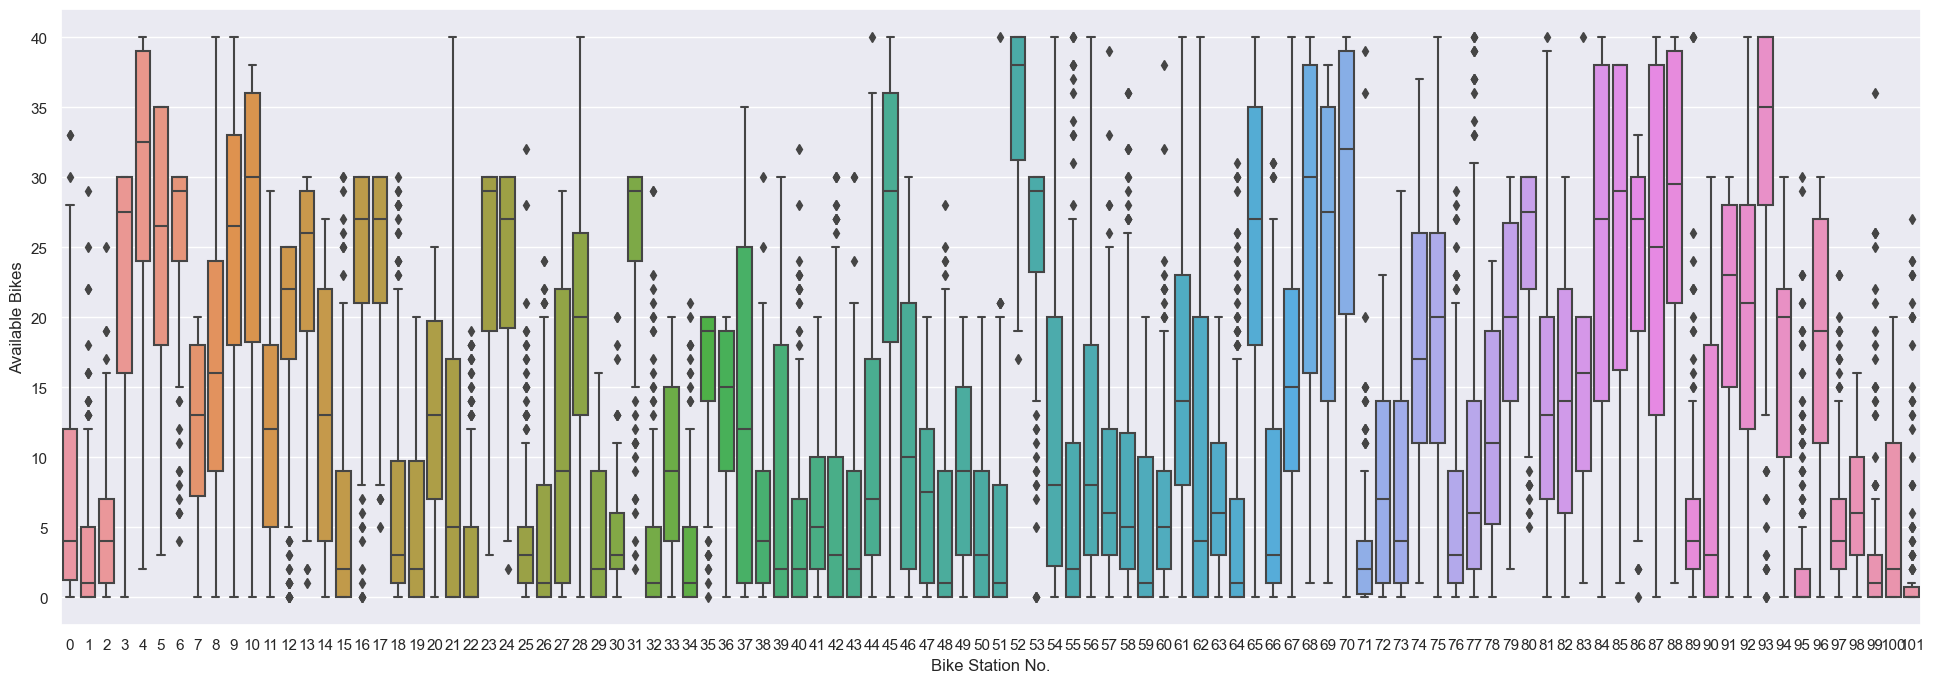

In [17]:
tmp = []
for i in range(len(dataset.days)):
    ori_df = dataset.get_data_by_date(dataset.days[i])
    tmp.append(ori_df.iloc[-1,:].to_numpy())
tmp = np.array(tmp)
tmp.shape,df.shape
plot_df = pd.DataFrame(tmp,columns=df.columns)
sns.boxplot(data=tmp)
plt.xlabel('Bike Station No.')
plt.ylabel('Available Bikes')
plt.show()

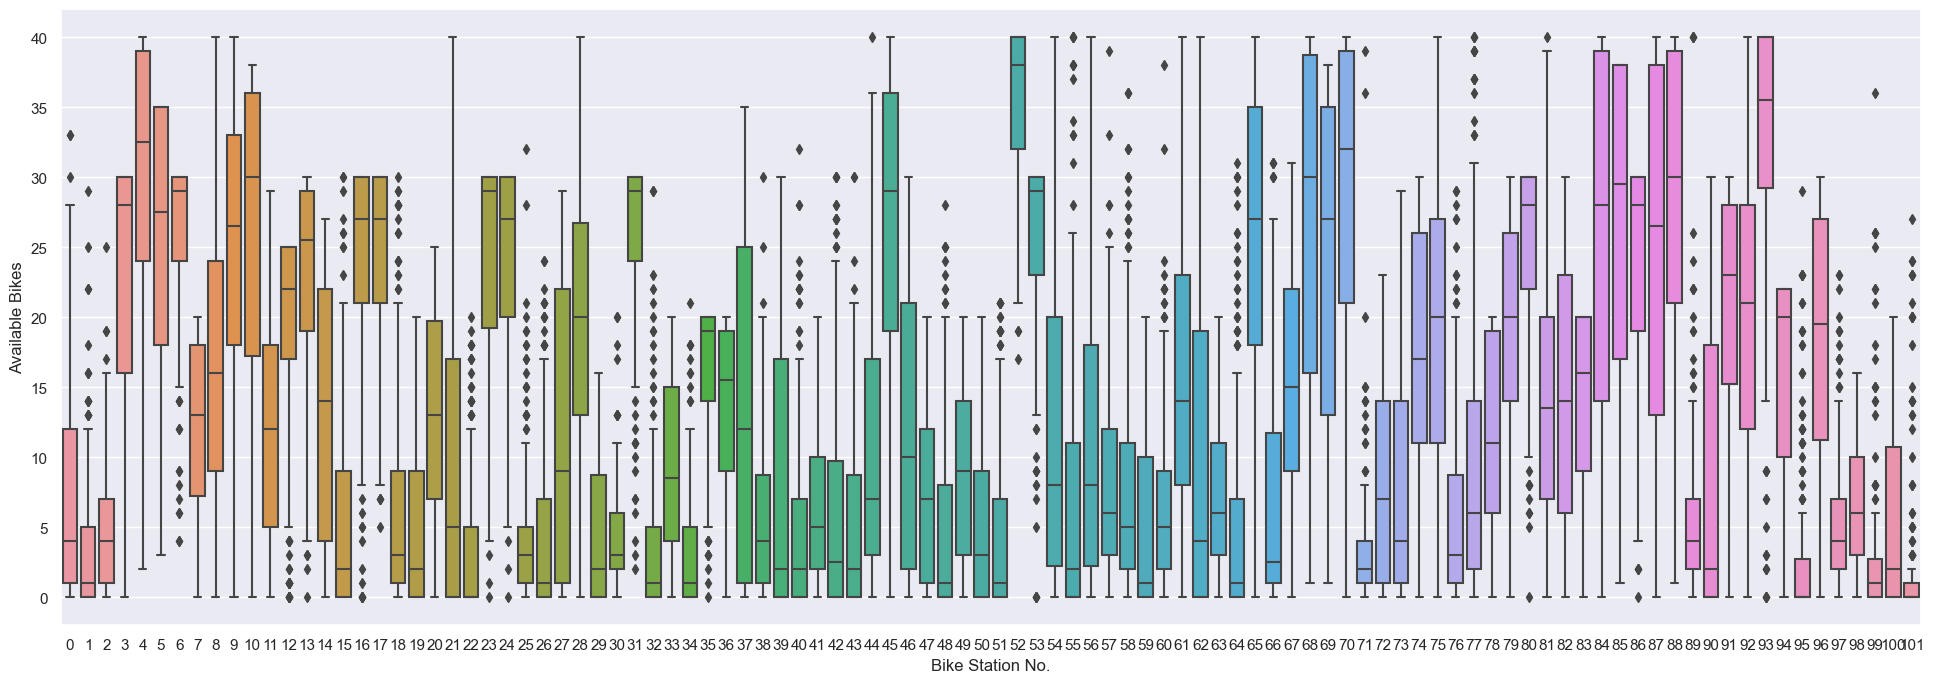

In [18]:
tmp = []
for i in range(len(dataset.days)):
    ori_df = dataset.get_data_by_date(dataset.days[i])
    tmp.append(ori_df.iloc[0,:].to_numpy())
tmp = np.array(tmp)
tmp.shape,df.shape
plot_df = pd.DataFrame(tmp,columns=df.columns)
sns.boxplot(data=tmp)
plt.xlabel('Bike Station No.')
plt.ylabel('Available Bikes')
plt.show()

In [19]:
# predict

def evaluation_metric(df:pd.DataFrame):
    return (df == 0).sum()


In [20]:
df_np = df.to_numpy()
mean_mat = np.expand_dims(df_np.mean(axis=1),axis=1).repeat(df.shape[1],axis=1)
delta_df = mean_mat - df_np

In [21]:
new_df = df_np[1:,:] + delta_df[:1,:]

In [22]:
df_s = np.vstack([df_np[0,:],new_df])

In [23]:
df_s = pd.DataFrame(df_s,columns=df.columns,index=df.index)

In [24]:
(df_s==0).sum()

FENIAN_STREET              0
CITY_QUAY                  1
FITZWILLIAM_SQUARE_EAST    1
BROOKFIELD_ROAD            0
EMMET_ROAD                 0
                          ..
GRATTAN_STREET             1
HARDWICKE_STREET           0
HATCH_STREET               1
GOLDEN_LANE                1
CLARENDON_ROW              1
Length: 102, dtype: int64

In [25]:
(df_s==0).mean().mean(),((df_s==0).sum()/df_s.shape[0]).std()

(1.3759986482189282e-06, 2.799943930581313e-06)

In [26]:
print(df_s.iloc[10000:10006,41:44].to_markdown())

|                     |   PARNELL_STREET |   ST._STEPHEN'S_GREEN_SOUTH |   PEARSE_STREET |
|:--------------------|-----------------:|----------------------------:|----------------:|
| 2017-02-06 20:42:09 |          18.6863 |                     16.6863 |         21.6863 |
| 2017-02-06 20:44:08 |          18.6863 |                     16.6863 |         21.6863 |
| 2017-02-06 20:46:09 |          16.6863 |                     16.6863 |         21.6863 |
| 2017-02-06 20:48:09 |          16.6863 |                     15.6863 |         20.6863 |
| 2017-02-06 20:50:09 |          16.6863 |                     15.6863 |         20.6863 |
| 2017-02-06 20:52:08 |          16.6863 |                     15.6863 |         20.6863 |


Text(0.5, 12.44444444444443, 'Empty Rate')

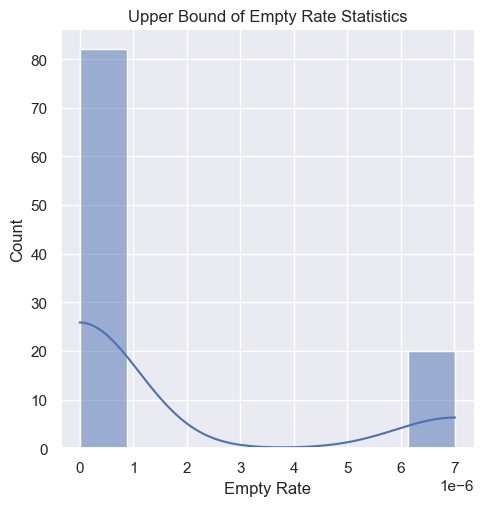

In [27]:
sns.displot((df_s==0).sum()/df_s.shape[0],kde=True)
plt.title('Upper Bound of Empty Rate Statistics')
plt.xlabel('Empty Rate')

Text(0.5, 12.44444444444443, 'Empty Rate')

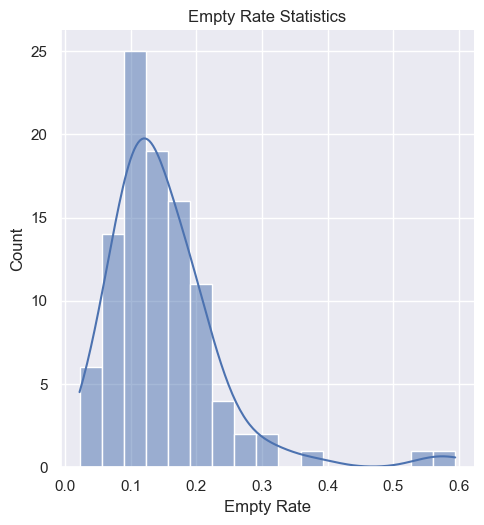

In [28]:
sns.displot((df==0).sum()/df.shape[0],kde=True)
plt.title('Empty Rate Statistics')
plt.xlabel('Empty Rate')

In [29]:
import seaborn as sns
import numpy as np
import xgboost
import pandas as pd
import os
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(24,8)})
DEBUG = True

def make_label(df):
    return ((df==0).sum()/(df==0).sum().max())

def time_series_feature_constructor(df):
    ans = pd.DataFrame()
    ans['max'] = df.transpose().max(axis=1)
    ans['min'] = df.transpose().min(axis=1)
    ans['mean'] = df.transpose().mean(axis=1)
    ans['last'] = df.transpose().iloc[:,-1]
    ans['median'] = df.transpose().iloc[:,df.shape[0]//2]
    return ans



X = pd.DataFrame()
Y = pd.DataFrame()
# Read in the bikes data
data_path = 'data/'
N = len(os.listdir(data_path))
ori_df = []
groups = []
for i,f in enumerate(os.listdir(data_path)[:]):
    print('\r',i/N,end='')
    if 'bikes' in f and 'to' not in f and f.split(".")[-1] == 'csv':
        try:
            tmp = pd.read_csv(data_path + f,index_col=0)
            tmp['time_stamp'] = f[-14:-4]+' '+tmp.index
            ori_df.append(tmp)
            groups.append(tmp.shape[0])
        except:
            print("Error in file {}".format(f))
df = pd.concat(ori_df,axis=0)

 0.995192307692307766

Text(0.5, 1.0, 'Distribution of the size of data in a day')

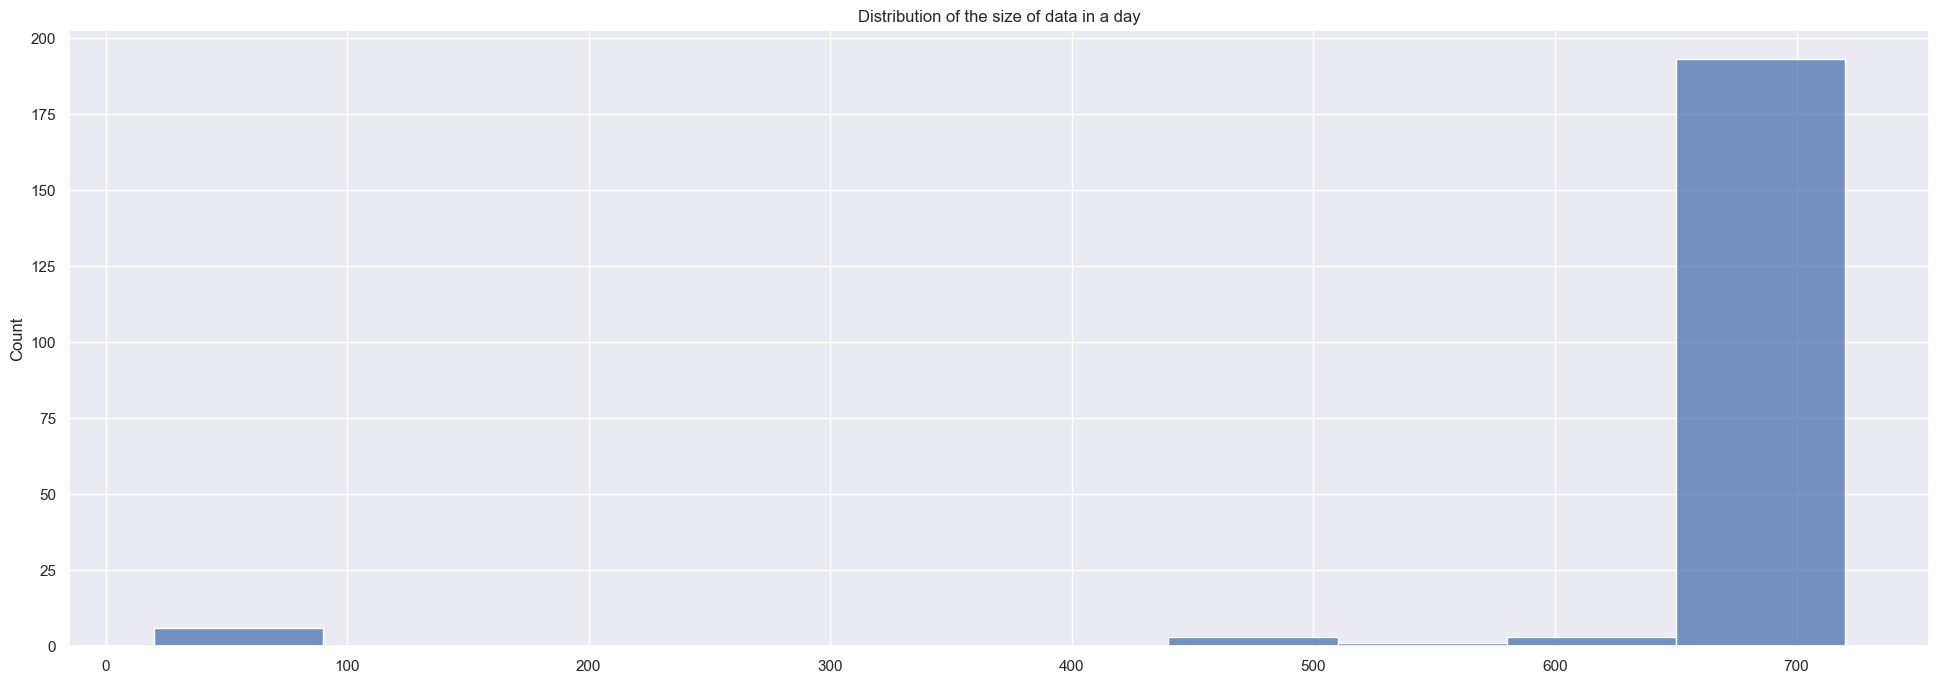

In [30]:
sns.histplot(groups,bins=10)
plt.title('Distribution of the size of data in a day')

<AxesSubplot: ylabel='Count'>

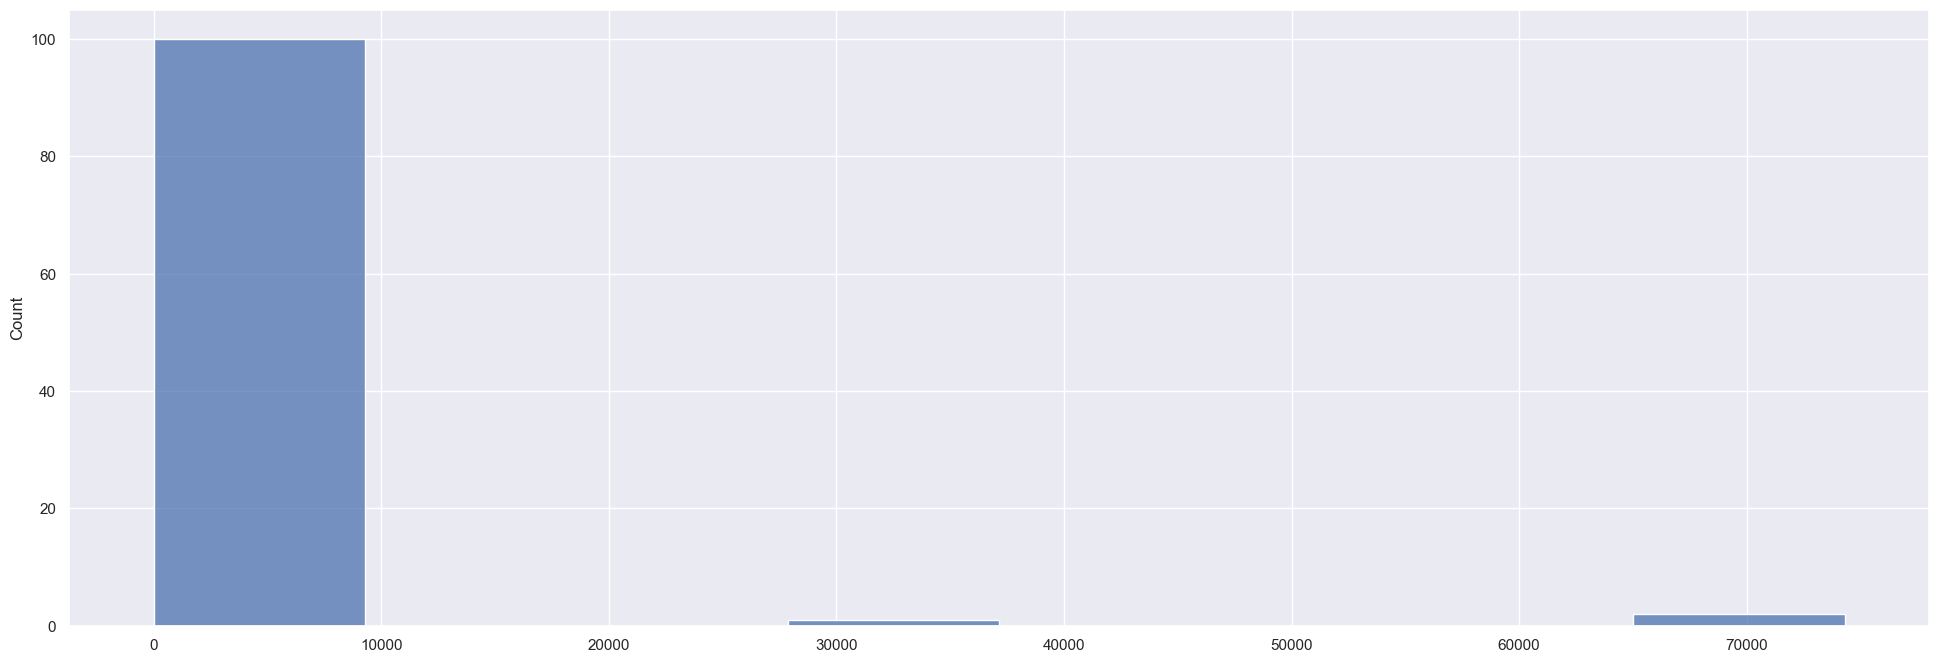

In [31]:
sns.histplot(df.isna().sum())

Text(0.5, 0, 'Empty Rate')

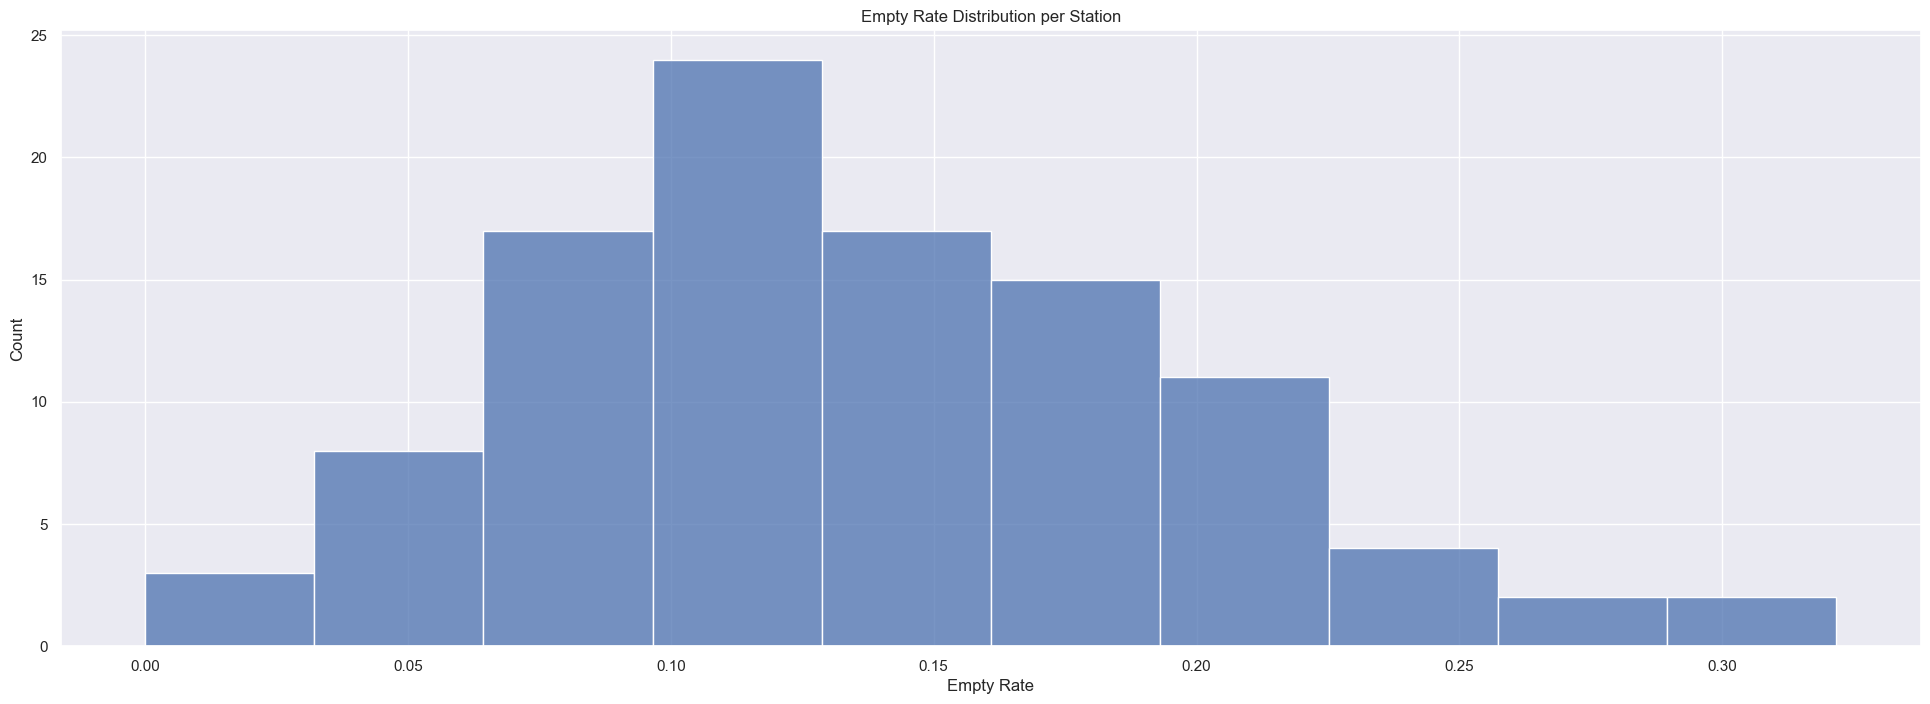

In [32]:
sns.histplot((df == 0).mean(axis=0))
plt.title('Empty Rate Distribution per Station')
plt.xlabel('Empty Rate')